In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

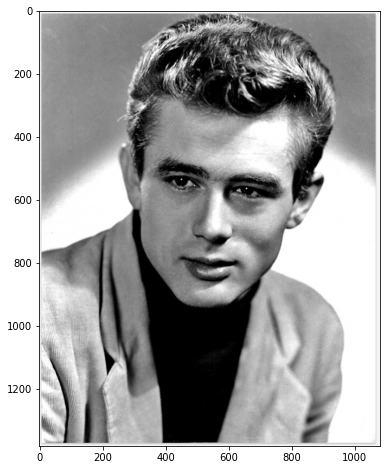

In [5]:
img = mpimg.imread('/content/drive/MyDrive/study_python/data/face_detection_test_01.jpg')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

In [8]:
import requests

client_id = "oCZmcUzHXHfOfqS4JGXA"
client_secret = "JnwxLxTPXU"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image' : open('/content/drive/MyDrive/study_python/data/face_detection_test_01.jpg', 'rb')}
headers = {"X-Naver-Client-Id" : client_id, "X-Naver-Client-Secret" : client_secret}

response = requests.post(url, files=files, headers=headers)

In [9]:
import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이병헌",
                "confidence": 0.189236
            }
        }
    ]
}


In [10]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('/content/drive/MyDrive/study_python/data/face_detection_test_01.jpg', 'rb')}
headers = {"X-Naver-Client-Id" : client_id, "X-Naver-Client-Secret" : client_secret}

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 328,
                "y": 450,
                "width": 458,
                "height": 458
            },
            "landmark": {
                "leftEye": {
                    "x": 449,
                    "y": 532
                },
                "rightEye": {
                    "x": 666,
                    "y": 568
                },
                "nose": {
                    "x": 539,
                    "y": 694
                },
                "leftMouth": {
                    "x": 448,
                    "y": 782
                },
                "rightMouth": {
                    "x": 636,
                    "y": 799
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999998
            },
         

In [12]:
dict_sample = {'Name' : 'pinkwink', 'Age' : 'None', 'Class' : ['beginner', 'blog']}
dict_sample

{'Age': 'None', 'Class': ['beginner', 'blog'], 'Name': 'pinkwink'}

In [13]:
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [14]:
dict_sample['Class']

['beginner', 'blog']

In [15]:
dict_sample.get('Name')

'pinkwink'

In [16]:
dict_sample.get('Age', 'nothing')

'None'

In [17]:
dict_sample.get('room', 'nothing')

'nothing'

In [18]:
customer = {
    'id' : '0001',
    'name' : '홍길동',
    'history' : [
                 {'date' : '2019-03-01', 'log' : True},
                 {'date' : '2019-03-02', 'log' : False},
    ]
}

In [20]:
import json

json_test = json.dumps(customer, indent = 4, ensure_ascii=False)

print(json_test)

{
    "id": "0001",
    "name": "홍길동",
    "history": [
        {
            "date": "2019-03-01",
            "log": true
        },
        {
            "date": "2019-03-02",
            "log": false
        }
    ]
}


In [21]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('/content/drive/MyDrive/study_python/data/face_detection_test_01.jpg', 'rb')}
headers = {"X-Naver-Client-Id" : client_id, "X-Naver-Client-Secret" : client_secret}

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [22]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [23]:
detect_result['faces']

[{'age': {'confidence': 0.17594, 'value': '26~30'},
  'emotion': {'confidence': 0.999995, 'value': 'neutral'},
  'gender': {'confidence': 0.999998, 'value': 'male'},
  'landmark': {'leftEye': {'x': 449, 'y': 532},
   'leftMouth': {'x': 448, 'y': 782},
   'nose': {'x': 539, 'y': 694},
   'rightEye': {'x': 666, 'y': 568},
   'rightMouth': {'x': 636, 'y': 799}},
  'pose': {'confidence': 0.997619, 'value': 'frontal_face'},
  'roi': {'height': 458, 'width': 458, 'x': 328, 'y': 450}}]

In [24]:
detect_result['faces'][0]

{'age': {'confidence': 0.17594, 'value': '26~30'},
 'emotion': {'confidence': 0.999995, 'value': 'neutral'},
 'gender': {'confidence': 0.999998, 'value': 'male'},
 'landmark': {'leftEye': {'x': 449, 'y': 532},
  'leftMouth': {'x': 448, 'y': 782},
  'nose': {'x': 539, 'y': 694},
  'rightEye': {'x': 666, 'y': 568},
  'rightMouth': {'x': 636, 'y': 799}},
 'pose': {'confidence': 0.997619, 'value': 'frontal_face'},
 'roi': {'height': 458, 'width': 458, 'x': 328, 'y': 450}}

In [25]:
detect_result['faces'][0]['gender']

{'confidence': 0.999998, 'value': 'male'}

In [26]:
detect_result['faces'][0]['age']

{'confidence': 0.17594, 'value': '26~30'}

In [27]:
detect_result['faces'][0]['emotion']

{'confidence': 0.999995, 'value': 'neutral'}

In [28]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [30]:
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)

print(annotation)

male : 0.999998
neutral : 0.999995
26~30 : 0.17594


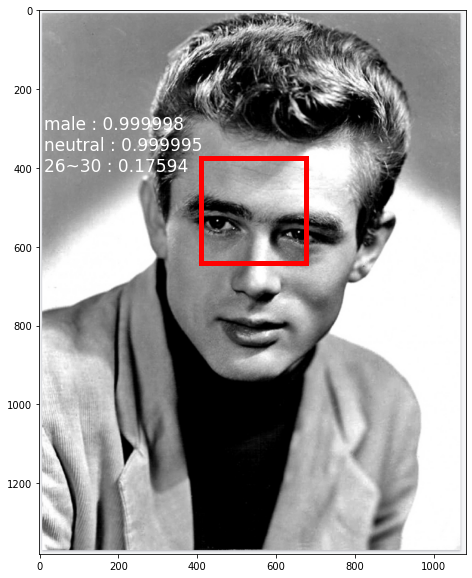

In [38]:
import matplotlib.patches as patches

img = mpimg.imread('/content/drive/MyDrive/study_python/data/face_detection_test_01.jpg')

fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img)
rect_face = patches.Rectangle((x, y), w, h,
                              linewidth = 5,
                              edgecolor='r',
                              facecolor='none')

ax.add_patch(rect_face)

plt.text(10, 400, annotation, wrap=True, fontsize=17, color='white')
plt.show()

In [33]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('/content/drive/MyDrive/study_python/data/face_detection_test_02.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id,
           'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [34]:
detect_result

{'faces': [{'age': {'confidence': 1.0, 'value': '0~2'},
   'emotion': {'confidence': 0.995791, 'value': 'laugh'},
   'gender': {'confidence': 1.0, 'value': 'child'},
   'landmark': {'leftEye': {'x': 889, 'y': 517},
    'leftMouth': {'x': 892, 'y': 602},
    'nose': {'x': 928, 'y': 551},
    'rightEye': {'x': 977, 'y': 513},
    'rightMouth': {'x': 975, 'y': 600}},
   'pose': {'confidence': 0.999813, 'value': 'frontal_face'},
   'roi': {'height': 208, 'width': 208, 'x': 833, 'y': 453}},
  {'age': {'confidence': 0.246723, 'value': '21~25'},
   'emotion': {'confidence': 0.535313, 'value': 'talking'},
   'gender': {'confidence': 0.997118, 'value': 'female'},
   'landmark': None,
   'pose': {'confidence': 0.918109, 'value': 'left_face'},
   'roi': {'height': 249, 'width': 249, 'x': 1098, 'y': 341}},
  {'age': {'confidence': 0.0199849, 'value': '14~18'},
   'emotion': {'confidence': 0.997795, 'value': 'laugh'},
   'gender': {'confidence': 0.994603, 'value': 'female'},
   'landmark': None,
  

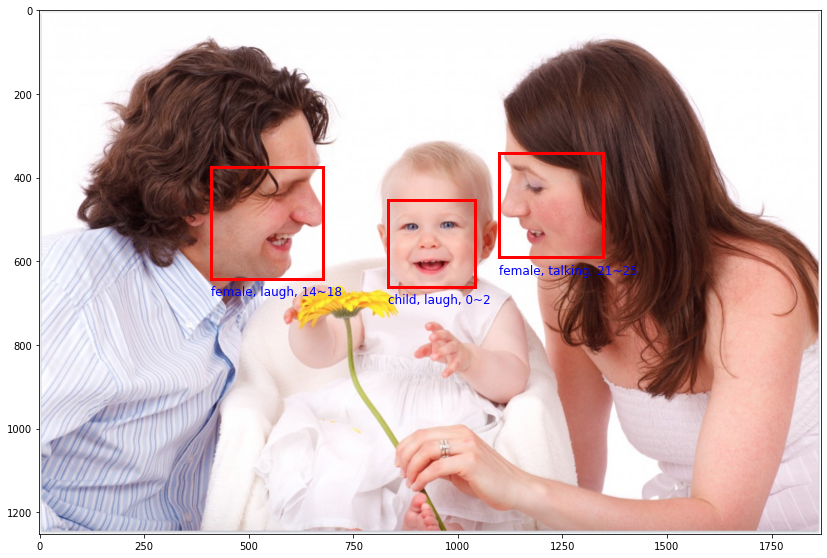

In [39]:
img = mpimg.imread('/content/drive/MyDrive/study_python/data/face_detection_test_02.jpg')

fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()

    rect_face = patches.Rectangle((x, y), w, h, linewidth=3,
                                  edgecolor='r', facecolor='none')
    ant_letter = gender + ', ' + emotion + ', ' + age
    plt.text(x, y + h + 40, ant_letter, size = 12, color = 'blue')
    ax.add_patch(rect_face)

plt.show()